In [1]:
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPool2D,BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import preprocess_input,decode_predictions
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [2]:
img_height,img_width = (224,224)
batch_size = 32

train_data_dir = "/content/drive/MyDrive/FinalYear_Project/DATASET_for_DL/swedish_dl/train"
valid_data_dir = "/content/drive/MyDrive/FinalYear_Project/DATASET_for_DL/swedish_dl/val"
test_data_dir =  "/content/drive/MyDrive/FinalYear_Project/DATASET_for_DL/swedish_dl/test"

In [3]:
'''
from google.colab import drive
drive.mount('/content/drive')
'''

"\nfrom google.colab import drive\ndrive.mount('/content/drive')\n"

In [4]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip = True,
                                   validation_split=0.4)


train_generator = train_datagen.flow_from_directory( 
      train_data_dir,
      target_size=(img_height,img_width),
      batch_size=batch_size,
      class_mode='categorical',
      subset = 'training') #set of training data




Found 585 images belonging to 15 classes.


In [5]:
# Data Augmentation
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip = True,
                                   validation_split=0.4)

test_set = test_datagen.flow_from_directory(test_data_dir,
                                            target_size=(img_height,img_width),
                                            batch_size=batch_size,
                                            class_mode = 'categorical',subset='validation')

Found 60 images belonging to 15 classes.


In [6]:
base_model = ResNet50(include_top=False,weights='imagenet')
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024,activation='relu')(x)
predictions = Dense(train_generator.num_classes,activation='softmax')(x)
model = Model(inputs=base_model.input,outputs=predictions)

for layer in base_model.layers:
  layer.trainable = False

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(train_generator, validation_data=test_set,epochs=10)




94773248/94765736 [==============================] - 1s 0us/step
Epoch 1/10
19/19 [==============================] - 366s 18s/step - loss: 1.2806 - accuracy: 0.6581 - val_loss: 0.2092 - val_accuracy: 0.9333
Epoch 2/10
19/19 [==============================] - 67s 4s/step - loss: 0.1571 - accuracy: 0.9402 - val_loss: 0.0856 - val_accuracy: 0.9667
Epoch 3/10
19/19 [==============================] - 27s 1s/step - loss: 0.0455 - accuracy: 0.9880 - val_loss: 0.0226 - val_accuracy: 1.0000
Epoch 4/10
19/19 [==============================] - 16s 837ms/step - loss: 0.0288 - accuracy: 0.9932 - val_loss: 0.0264 - val_accuracy: 0.9833
Epoch 5/10
19/19 [==============================] - 16s 832ms/step - loss: 0.0268 - accuracy: 0.9932 - val_loss: 0.0214 - val_accuracy: 1.0000
Epoch 6/10
19/19 [==============================] - 16s 831ms/step - loss: 0.0595 - accuracy: 0.9761 - val_loss: 0.0895 - val_accuracy: 0.9833
Epoch 7/10
19/19 [==============================] - 16s 831ms/step - loss: 0.0563 - 

In [7]:
model.save('/content/drive/MyDrive/FinalYear_Project/swedish_model/Resnet.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [8]:
test_loss,test_acc = model.evaluate(test_set,verbose=2)
print('Test Accuracy : ',test_acc)


2/2 - 2s - loss: 0.0038 - accuracy: 1.0000
Test Accuracy :  1.0


In [9]:
##Classes 
test_set.class_indices

{'Acer': 0,
 'Alnus incana': 1,
 'Betula pubescens': 2,
 'Fagus silvatica': 3,
 'Populus': 4,
 'Populus tremula': 5,
 'Quercus': 6,
 'Salix alba': 7,
 'Salix aurita': 8,
 'Salix sinerea': 9,
 'Sorbus aucuparia': 10,
 'Sorbus intermedia': 11,
 'Tilia': 12,
 'Ulmus carpinifolia': 13,
 'Ulmus glabra': 14}

Copy of l10nr065.tif


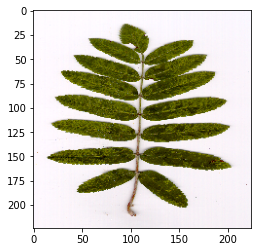

[[3.8080233e-10 6.3429952e-13 1.6948491e-09 1.2130723e-15 5.7723455e-13
  4.8347236e-11 1.7762382e-12 2.5600566e-09 1.1469553e-11 1.1345587e-09
  9.9999905e-01 1.0060684e-06 1.0189696e-08 2.7171938e-09 4.6928527e-11]]
Copy of l11nr071.tif


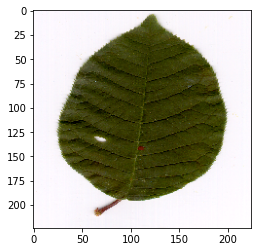

[[1.1298655e-06 7.7289677e-09 5.3216773e-03 2.0389402e-07 2.3075550e-05
  5.0094063e-06 1.8474536e-08 1.8737250e-06 4.9801965e-08 9.7114009e-01
  7.6912374e-06 1.4209068e-06 1.5278890e-04 1.6983761e-02 6.3612037e-03]]
Copy of l13nr065.tif


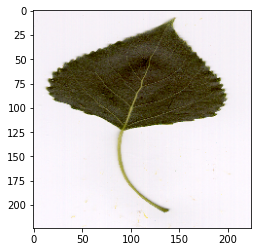

[[8.4749757e-07 4.1793240e-07 8.8622926e-08 7.7383806e-09 4.8028409e-07
  3.3927248e-05 2.7956215e-11 6.8877976e-06 1.0602921e-09 5.8953457e-08
  2.4326093e-08 1.8795947e-09 9.9995720e-01 5.9261450e-12 2.4727278e-08]]
Copy of l4nr070.tif


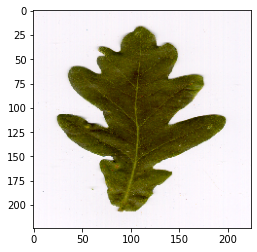

[[2.4057902e-01 7.5031807e-08 1.1642170e-04 9.3080521e-09 7.5915541e-06
  4.4918092e-05 5.8105832e-01 1.1594398e-05 4.1704516e-07 2.9356876e-05
  1.5662330e-01 2.0665407e-02 7.4209913e-04 1.2053076e-04 9.7894042e-07]]
Copy of l6nr070.tif


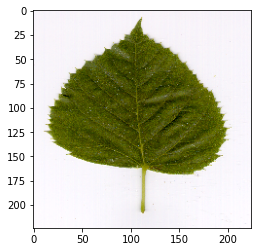

[[4.2678807e-03 5.8223908e-05 9.2708522e-01 2.1056424e-06 1.0057436e-02
  4.0708328e-05 2.3133026e-07 1.5979967e-05 1.5271489e-07 2.1846432e-04
  7.4654218e-04 2.3401887e-04 3.6025688e-02 1.9748963e-02 1.4984715e-03]]


In [10]:
import cv2
import os
import numpy as np

dir_path = '/content/drive/MyDrive/FinalYear_Project/DATASET_for_DL/swedish_dl/val'
##Predicting with model
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/FinalYear_Project/swedish_model/Resnet.h5')

for i in os.listdir(dir_path):
   img =  image.load_img(dir_path+'/'+i,target_size=(224,224))
   print(i)
   plt.imshow(img)
   plt.show()
   X = image.img_to_array(img)
   X = np.expand_dims(X,axis=0)
   images = np.vstack([X])
   val = loaded_model.predict(images)
   print(val)



In [11]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [12]:
def plot_model(model):
    return tf.keras.utils.plot_model(
        model=model,
        to_file='/content/drive/MyDrive/FinalYear_Project/Results/ResnetModel.png',
        show_shapes=True,
        show_layer_names=False,
        rankdir='TB',
        expand_nested=True,
        dpi=96
    )

In [13]:
def plot_model_hist(history):
    plt.figure(figsize=(20, 6))
    plt.title('Results')

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], color='orange', label='Training loss')
    plt.plot(history.history['val_loss'], color='red', label='Validation loss')
    plt.legend()
    plt.title(label='Loss')
    plt.xlabel(xlabel='Epochs')
    plt.ylabel(ylabel='Loss Value')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], color='blue', label='Training accuracy')
    plt.plot(history.history['val_accuracy'], color='green', label='Validation accuracy')
    plt.legend();
    plt.title(label='Accuracy')
    plt.xlabel(xlabel='Epochs')
    plt.ylabel(ylabel='Accuracy Value')

    plt.savefig(fname='/content/drive/MyDrive/FinalYear_Project/Results/ResNETmodel_history.png', orientation='landscape')

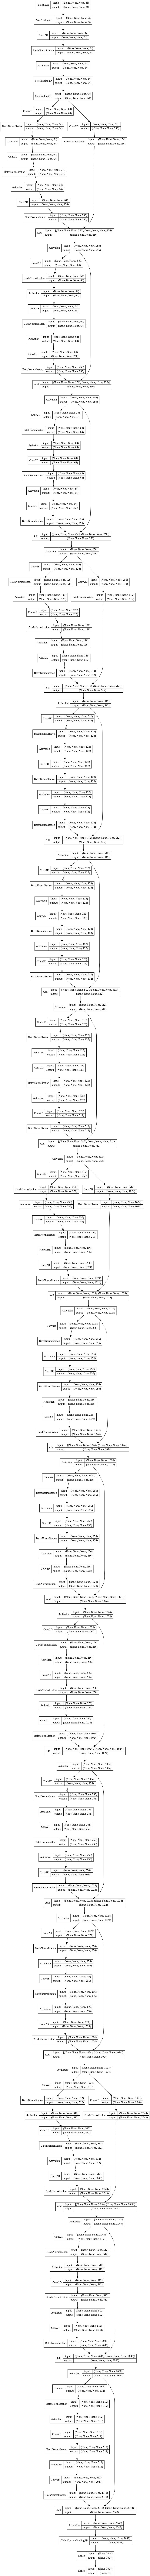

In [14]:
plot_model(model=model)

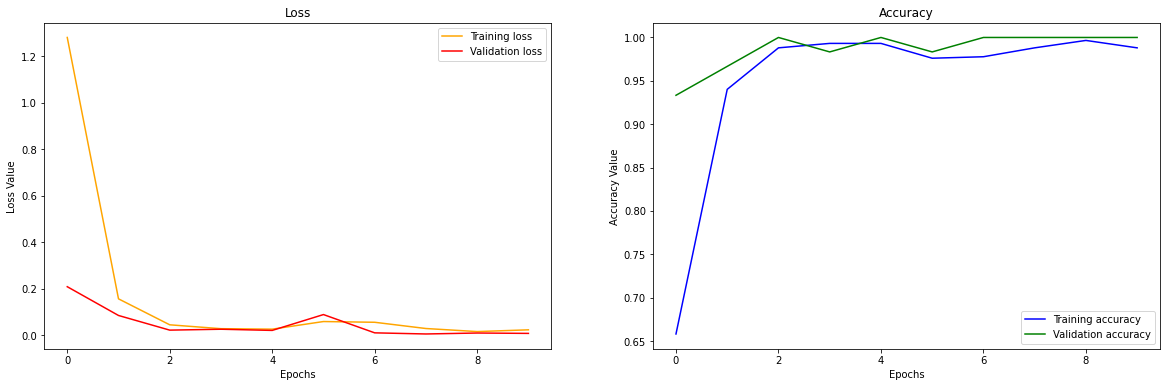

In [15]:
plot_model_hist(history=history)

In [16]:
#Code to generate Confusion Matrix
import pandas as pd
import seaborn as sn
import tensorflow as tf
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix


model = tf.keras.models.load_model('/content/drive/MyDrive/FinalYear_Project/swedish_model/Resnet.h5')
filenames = test_generator.filenames
nb_samples = len(test_generator)
y_prob = []
y_act = []
test_generator.reset()

for _ in range(nb_samples):
  X_test,Y_test = test_generator.next()
  y_prob.append(model.predict(X_test))
  y_act.append(Y_test)
  y_pred1 = model.predict(X_test)
  arr = np.zeros((15))
  y_pred1 = np.argmax(y_pred1,axis=1)
  arr[y_pred1] = 1
  arr = np.reshape(arr, (1,-1)) 





NameError: ignored

In [ ]:
X_test.shape

In [ ]:
print(Y_test)
print(arr)
Y_test.shape

In [ ]:
#print('Y act : {} , Y pred : {} '.format(Y_test,arr))
print('f1 Score : {} , Precision Score : {} , Recall Score : {}'.format(f1_score(Y_test,arr,average='weighted'),precision_score(Y_test, arr, average="macro"),recall_score(Y_test, arr, average="macro")))

In [ ]:
#print(y_prob)
print(y_act)

In [ ]:

predicted_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_prob]
actual_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_act]

out_df = pd.DataFrame(np.vstack([predicted_class,actual_class]).T,columns=['predicted_class','actual_class'])
confusion_matrix = pd.crosstab(out_df['actual_class'],out_df['predicted_class'],rownames=['Actual'],colnames=['Predicted'])

sn.heatmap(confusion_matrix,cmap='Blues',annot=True,fmt='d')
plt.show()

#print('Test accuracy : {}'.format((np.diagonal(confusion_matrix).sum()/confusion_matrix.sum()*100)))
#print(predicted_class)
#print(actual_class)
print(confusion_matrix)



In [ ]:


#print(f1_score(out_df['actual_class'], out_df['predicted_class'], average="macro"))
#print(precision_score(y_test, y_pred, average="macro"))
#print(recall_score(y_test, y_pred, average="macro"))  


In [ ]:
'''
# predict probabilities for test set
yhat_probs = model1.predict(x, verbose=0)
# predict crisp classes for test set
yhat_classes = model.predict_classes(x, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]
 
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y, yhat_classes)
print('F1 score: %f' % f1)
'''